In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
df=pd.read_csv('../../data/raw/data.csv')

In [4]:
df.head()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [5]:
df.isnull().sum()

make                     0
model                    0
year                     0
mileage                  0
engine_hp                0
transmission             0
fuel_type                0
drivetrain               0
body_type                0
exterior_color           0
interior_color           0
owner_count              0
accident_history    750133
seller_type              0
condition                0
trim                     0
vehicle_age              0
mileage_per_year         0
brand_popularity         0
price                    0
dtype: int64

In [6]:
df.describe()

,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,price
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2017.453816,112660.126464,235.664301,3.477846,7.585987,14540.674200,0.040001,20329.302593
std,3.902285,72088.236925,93.614773,1.544856,3.829534,6108.901522,0.000234,13644.467189
min,2000.000000,500.000000,90.000000,1.000000,1.000000,33.333333,0.039318,1500.000000
25%,2015.000000,57654.000000,162.000000,2.000000,5.000000,10487.633523,0.039842,10324.527500
50%,2018.000000,103331.000000,215.000000,4.000000,7.000000,14688.118056,0.040022,17864.740000
75%,2020.000000,157865.000000,300.000000,5.000000,10.000000,18685.942308,0.040148,27601.402500
max,2025.000000,300000.000000,581.000000,5.000000,25.000000,55391.000000,0.040484,93422.090000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1000000 non-null  object 
 1   model             1000000 non-null  object 
 2   year              1000000 non-null  int64  
 3   mileage           1000000 non-null  int64  
 4   engine_hp         1000000 non-null  int64  
 5   transmission      1000000 non-null  object 
 6   fuel_type         1000000 non-null  object 
 7   drivetrain        1000000 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  int64  
 12  accident_history  249867 non-null   object 
 13  seller_type       1000000 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 non-null  object 
 16  v

In [8]:
df['model'].value_counts()

model
300         20202
Pacifica    19857
2500        13539
3500        13464
Charger     13457
            ...  
RAV4         7880
Escape       7879
3 Series     7871
Corolla      7837
X5           7823
Name: count, Length: 105, dtype: int64

In [9]:
df['transmission'].value_counts() #ohe


transmission
Automatic    500263
Manual       499737
Name: count, dtype: int64

In [10]:
df['model'].unique()#target encoding


array(['Jetta', 'RX', 'Crosstrek', 'Lyriq', 'Highlander', 'Defender',
       'Mazda3', 'Atlas', '2500', '300', 'Yukon', 'XT5', 'Range Rover',
       'S60', 'Camry', 'Q5', 'Silverado', 'Model 3', '3500', 'Sonata',
       'Camaro', 'Explorer', '911', 'MDX', 'Sentra', 'Mustang',
       'Discovery', 'R8', 'Forte', 'Equinox', 'Model Y', '1500',
       'Grand Cherokee', 'Mazda6', 'M3', 'Malibu', 'Pacifica', 'Panamera',
       'Pathfinder', 'V60', 'A6', 'Sorento', 'Cherokee', 'IS', 'Macan',
       'Tiguan', 'Tucson', '3 Series', 'Durango', 'Titan', 'TLX',
       'S-Class', 'E-Class', 'RDX', 'Corolla', 'RAV4', 'F-150', 'X5',
       'Outback', 'Cayenne', 'Rogue', 'Accord', 'Acadia', 'ES',
       'Sportage', 'Tacoma', 'CT5', 'Challenger', 'Sierra', 'Wrangler',
       'Altima', 'Model S', 'GLE', 'NX', 'Tahoe', 'Q7', 'Integra',
       'Impreza', 'Terrain', 'Civic', 'XC60', 'X3', 'Golf', 'Escape',
       'XC90', 'Santa Fe', 'CX-9', 'Focus', 'CX-5', 'CR-V', 'Odyssey',
       'Elantra', 'Model X', 'G

In [11]:
df['fuel_type'].value_counts()
#ohe

fuel_type
Electric    359597
Diesel      320453
Gasoline    319950
Name: count, dtype: int64

In [12]:
df['drivetrain'].value_counts()#ohe

drivetrain
AWD    361110
FWD    320142
RWD    318748
Name: count, dtype: int64

In [13]:

df['body_type'].value_counts()#ohe

body_type
SUV             406693
Sedan           326683
Pickup Truck    106773
Coupe            86302
Minivan          33259
Hatchback        26930
Wagon            13360
Name: count, dtype: int64

In [14]:
df['condition'].value_counts()#


condition
Good         499683
Excellent    400373
Fair          99944
Name: count, dtype: int64

In [15]:
df.drop('accident_history', axis=1, inplace=True)


In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Separate numeric and categorical columns
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# # Plot numeric columns
# for col in numeric_cols:
#      plt.figure(figsize=(6,4))
#     sns.scatterplot(x=df[col], y=df['price'])
#     plt.title(f'Price vs {col}')
#     plt.xlabel(col)
#     plt.ylabel('Price')
#     plt.show()


# for col in categorical_cols:
#     plt.figure(figsize=(6,4))

#     sns.scatterplot(x=df[ col], y=df['price'])
#     plt.title(f'Price vs {col} (Top 20 categories)')
#     plt.xlabel(col)
#     plt.ylabel('Price')
#     plt.xticks(rotation=45)
#     plt.show()




In [17]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# selected_columns = [
#     'year', 'mileage', 'engine_hp', 'vehicle_age', 
#     'make', 'transmission', 'fuel_type', 'drivetrain', 'body_type', 'price'
# ]

# df = df[selected_columns]

# X = df.drop('price', axis=1)
# y = df['price']

# categorical_cols = ['make', 'transmission', 'fuel_type', 'drivetrain', 'body_type']
# numeric_cols = ['year', 'mileage', 'engine_hp', 'vehicle_age']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
#     ]
# )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models = {
    
#     'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1,max_depth=12),
#     'GradientBoosting': GradientBoostingRegressor(n_estimators=50, random_state=42,max_depth=6)
# }

# results = []

# for name, model in models.items():
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
    
#     pipeline.fit(X_train, y_train)
    
#     y_pred = pipeline.predict(X_test)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     # rmse = mean_squared_error(y_test, y_pred, squared=False)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
    
#     results.append({
#         'Model': name,
#         'MAE': mae,
#         'RMSE': rmse,
#         'R2': r2
#     })

# results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
# print(results_df)


In [18]:
# import matplotlib.pyplot as plt

# # Suppose you want to plot for the best model (top R2)
# best_model_name = results_df.iloc[0]['Model']
# best_model = models[best_model_name]

# # Fit pipeline again (or you can save the pipeline from above)
# best_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', best_model)
# ])
# best_pipeline.fit(X_train, y_train)
# y_pred = best_pipeline.predict(X_test)

# # Plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # diagonal line
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title(f"Predicted vs Actual Price ({best_model_name})")
# plt.show()


In [19]:
# make                     0
# model                    0
# year                     0
# mileage                  0
# engine_hp                0
# transmission             0
# fuel_type                0
# drivetrain               0
# body_type                0
# exterior_color           0
# interior_color           0
# owner_count              0
# accident_history    750133
# seller_type              0
# condition                0
# trim                     0
# vehicle_age              0
# mileage_per_year         0
# brand_popularity         0
# price              

In [20]:
df['make'].unique()

array(['Volkswagen', 'Lexus', 'Subaru', 'Cadillac', 'Toyota',
       'Land Rover', 'Mazda', 'Ram', 'Chrysler', 'GMC', 'Volvo', 'Audi',
       'Chevrolet', 'Tesla', 'Hyundai', 'Ford', 'Porsche', 'Acura',
       'Nissan', 'Kia', 'Jeep', 'BMW', 'Dodge', 'Mercedes-Benz', 'Honda'],
      dtype=object)

In [21]:
df['transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [22]:
df['fuel_type'].unique()


array(['Electric', 'Gasoline', 'Diesel'], dtype=object)

In [23]:
df['drivetrain'].unique()


array(['RWD', 'FWD', 'AWD'], dtype=object)

In [24]:
df['body_type'].unique()


array(['Sedan', 'SUV', 'Hatchback', 'Pickup Truck', 'Coupe', 'Minivan',
       'Wagon'], dtype=object)

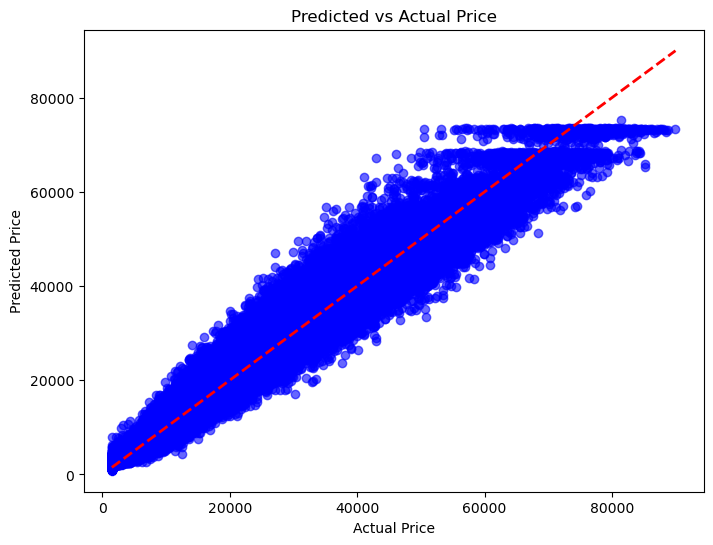

In [32]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

selected_columns = [
    'mileage', 'engine_hp', 'vehicle_age', 
    'make', 'transmission', 'fuel_type', 'drivetrain', 'body_type', 'price'
]

df = df[selected_columns]

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load fitted preprocessor and model
preprocessor = joblib.load('../../best_model/transformed_object/preprocessing.pkl')  # fitted ColumnTransformer
model = joblib.load('../../best_model/model.pkl')

# Transform test data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Predict
y_pred = model.predict(X_test_transformed)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.show()
